This is a notebook which lets you use the trained Inception model to classify a picture of our data set. Hence, in order to run this, you must have at least the correct dataframe file for our data set and a folder with the pictures that are listed in the dataframe, with correct file names (as listed in the dataframe), on your computer.

As opposed to the simple ``label_a_picture`` notebook, this one lets you see what the 'correct' labels, as decided by a human, are for a picture.

In [1]:
import numpy as np
import pandas as pd
import keras
import os
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [2]:
english = True
if english:
    label_lst = [
        "Living room", "Kitchen", "Hallway", "Bathroom", "Bedroom", "Balcony",
        "House", "Facade", "Sauna", "Terrace", "Separate Wc", "Floor plan",
        "Dining space", "Yard", "Other", "Upstairs", "Open kitchen",
        "Downstairs", "Room", "Clothes room", "Utility room", "WC", "Alcove",
        "Fireplace"
    ]
else:
    label_lst = [
        'Olohuone', 'Keittiö', 'Eteinen', 'Kylpyhuone', 'Makuuhuone',
        'Parveke', 'Talo', 'Julkisivu', 'Sauna', 'Terassi', 'Erillinen WC',
        'Pohjakuva', 'Ruokailutila', 'Other', 'Piha', 'Yläkerta', 'Avokeittiö',
        'Alakerta', 'Huone', 'Vaatehuone', 'Kodinhoitohuone', 'WC', 'Alkovi',
        'Takkahuone'
    ]

Function for generating a neat plot:

In [62]:
def plot(pred, only_important_labels):
    #setting parameters:
    fontsize = 9
    bar_color = 'lightblue'
    text_color = 'xkcd:tangerine'
    #preparing data:
    di = dict(zip(label_lst, pred[0]))
    prediction = sorted(di.items(), key=lambda kv: kv[1])
    labels = np.array(prediction)[:, 0]
    values = np.array(prediction)[:, 1].astype(np.float32)
    #building the plot:
    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)
    ax.barh(labels, values, color=bar_color)
    ax.set_xlabel('Certainty that this is shown in the picture')
    ax.set_ylabel('Detectable classes')
    ax.set_yticks([])
    #writing text, i.e. labels, to the right position:
    r = f.canvas.get_renderer()
    ts = [
        ax.text(0, 0, labels[i], fontweight='bold', fontsize=fontsize)
        for i, v in enumerate(values)
    ]
    widths = [
        t.get_window_extent(renderer=r).transformed(ax.transData.inverted()).x1
        for t in ts
    ]
    for t in ts:
        t.remove()
    inv = ax.transData.transform([70, 1])
    threshold = len(values) - np.argmax(np.flip(values - widths - 0.005) < 0)
    for i, v in enumerate(values):
        if i > threshold - 1:
            v = v - widths[i] - 0.008
        if (i > threshold - 1 or not only_important_labels):
            ax.text(
                v + 0.003,
                i - .3,
                labels[i],
                color=text_color,
                fontweight='bold',
                fontsize=fontsize)
    return f

Load the model:

In [4]:
path_to_model = 'data/weights.30.h5'
model = load_model(path_to_model)

Load our DataFrame:

In [5]:
path_to_df = 'data/inception_df_multilabel_v1'
if os.path.exists(path_to_df):
    df = pd.read_pickle(path_to_df)
else:
    print(
        'Please run the multi label notebook for processing the labels first!')

Load the image:

In [54]:
index = 11819 # which picture in the dataframe do you want to look at?

assert index>= 0 and index<len(df), 'Index must be between 0 and ' + str(len(df)-1)
path_to_image_folder = 'data/images/'
img = Image.open(path_to_image_folder + str(index) + '.png')

<IPython.core.display.Javascript object>


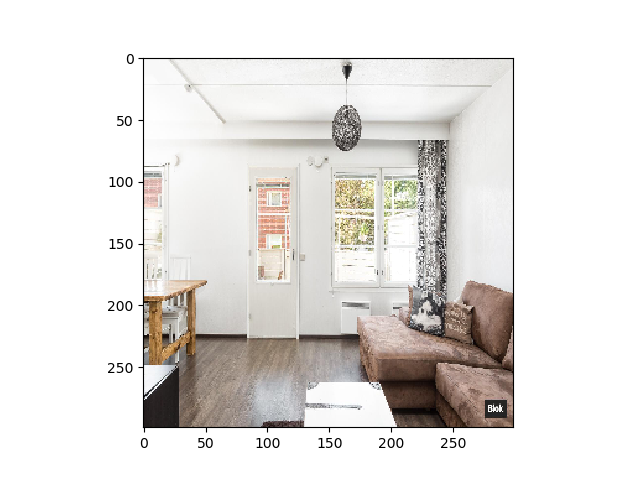

In [55]:
img_array = np.array(img) / 255
plt.figure()
plt.imshow(img_array)

Classify the picture:

In [56]:
pred = model.predict(np.array([img_array]))

The labels according to our data set:

In [57]:
[s for i, s in enumerate(label_lst) if df.labels[index][i]]

['Living room', 'Hallway']

The labels predicted by Inception:

<IPython.core.display.Javascript object>


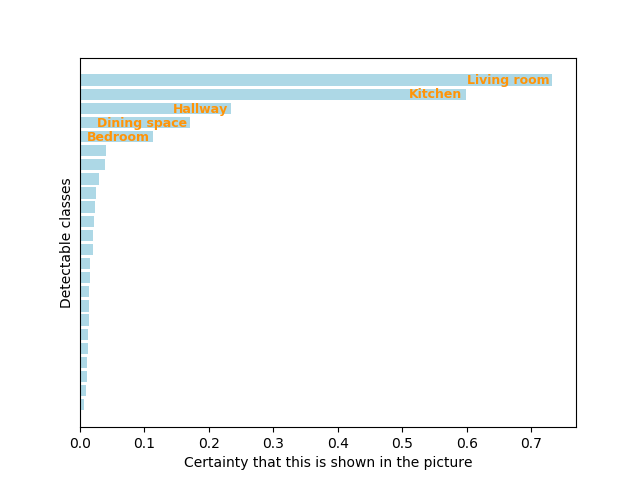

In [63]:
plot(pred, only_important_labels=True).show()

In [65]:
di = dict(zip(label_lst, pred[0]))
sorted(di.items(), key=lambda kv: kv[1], reverse=True)

[('Living room', 0.7327332),
 ('Kitchen', 0.598382),
 ('Hallway', 0.234283),
 ('Dining space', 0.17051303),
 ('Bedroom', 0.1139973),
 ('Alcove', 0.040933877),
 ('Open kitchen', 0.03924577),
 ('Other', 0.029428393),
 ('Terrace', 0.024765704),
 ('Balcony', 0.023115749),
 ('Downstairs', 0.022320155),
 ('Clothes room', 0.020324752),
 ('Wc', 0.019667326),
 ('House', 0.015872205),
 ('Sauna', 0.014779455),
 ('Utility room', 0.01461828),
 ('Upstairs', 0.014401645),
 ('Facade', 0.014290711),
 ('Room', 0.012525832),
 ('Floor plan', 0.012438572),
 ('Yard', 0.011317322),
 ('Fireplace', 0.010647807),
 ('Separate Wc', 0.009733434),
 ('Bathroom', 0.00574784)]